In [13]:
import numpy as np
import time
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
#any two point for convergence
#different mini batch sizes

In [14]:
# Load breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Add bias term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

X_train.shape, X_test.shape

((455, 31), (114, 31))

In [15]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (Binary Cross Entropy)
def compute_loss(y, y_pred):
    m = len(y)
    loss = -(1/m) * np.sum(y*np.log(y_pred + 1e-15) + (1-y)*np.log(1-y_pred + 1e-15)) # the small constant is added to avoid log(0) which will produce NAN, 1e-15 which is 0.000000000000001
    return loss

# Prediction
def predict(X, weights):
    return sigmoid(np.dot(X, weights))

In [19]:
def batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    losses = []

    start_time = time.time()
    for epoch in range(epochs):
        y_pred = predict(X, weights)
        gradient = (1/m) * np.dot(X.T, (y_pred - y))
        weights -= lr * gradient
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    end_time = time.time()

    return weights, losses, end_time - start_time


In [20]:
def mini_batch_gradient_descent(X, y, lr=0.01, epochs=1000, batch_size=32):
    m, n = X.shape
    weights = np.zeros(n)
    losses = []

    start_time = time.time()
    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            y_pred = predict(X_batch, weights)
            gradient = (1/len(y_batch)) * np.dot(X_batch.T, (y_pred - y_batch))
            weights -= lr * gradient

        y_pred_full = predict(X, weights)
        loss = compute_loss(y, y_pred_full)
        losses.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    end_time = time.time()

    return weights, losses, end_time - start_time

Epoch 0, Loss: 0.3165
Epoch 100, Loss: 0.0684
Epoch 200, Loss: 0.0598
Epoch 300, Loss: 0.0557
Epoch 400, Loss: 0.0532
Epoch 0, Loss: 0.4081
Epoch 100, Loss: 0.0796
Epoch 200, Loss: 0.0683
Epoch 300, Loss: 0.0629
Epoch 400, Loss: 0.0596
Epoch 0, Loss: 0.4979
Epoch 100, Loss: 0.0945
Epoch 200, Loss: 0.0790
Epoch 300, Loss: 0.0721
Epoch 400, Loss: 0.0678
Epoch 0, Loss: 0.5648
Epoch 100, Loss: 0.1143
Epoch 200, Loss: 0.0930
Epoch 300, Loss: 0.0835
Epoch 400, Loss: 0.0778
Epoch 0, Loss: 0.6220
Epoch 100, Loss: 0.1459
Epoch 200, Loss: 0.1148
Epoch 300, Loss: 0.1012
Epoch 400, Loss: 0.0931


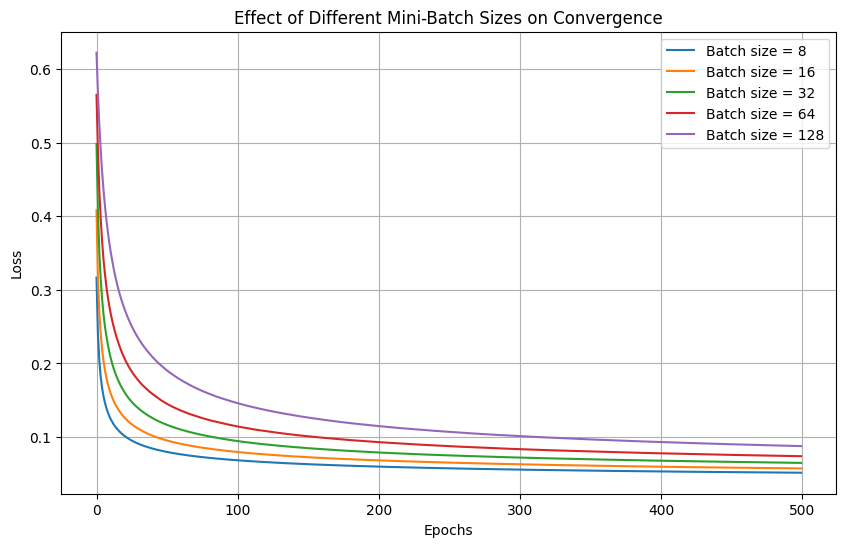

In [18]:
batch_sizes = [8, 16, 32, 64, 128]
losses_dict = {}

for bsize in batch_sizes:
    _, losses_mb, _ = mini_batch_gradient_descent(X_train, y_train, lr=0.01, epochs=500, batch_size=bsize)
    losses_dict[bsize] = losses_mb

# Plot the curves
plt.figure(figsize=(10,6))
for bsize, losses in losses_dict.items():
    plt.plot(losses, label=f"Batch size = {bsize}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Effect of Different Mini-Batch Sizes on Convergence")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
def stochastic_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    losses = []

    start_time = time.time()
    for epoch in range(epochs):
        for i in range(m):
            rand_i = np.random.randint(m)
            X_i = X[rand_i:rand_i+1]
            y_i = y[rand_i:rand_i+1]

            y_pred = predict(X_i, weights)
            gradient = np.dot(X_i.T, (y_pred - y_i))
            weights -= lr * gradient

        y_pred_full = predict(X, weights)
        loss = compute_loss(y, y_pred_full)
        losses.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    end_time = time.time()

    return weights, losses, end_time - start_time

In [11]:
# Run Batch GD
w_batch, losses_batch, time_batch = batch_gradient_descent(X_train, y_train, lr=0.01, epochs=1000)

# Run Mini-Batch GD
w_mini, losses_mini, time_mini = mini_batch_gradient_descent(X_train, y_train, lr=0.01, epochs=1000, batch_size=32)

# Run SGD
w_sgd, losses_sgd, time_sgd = stochastic_gradient_descent(X_train, y_train, lr=0.01, epochs=1000)

print("\n--- Training Time Comparison ---")
print(f"Batch GD: {time_batch:.4f} seconds")
print(f"Mini-Batch GD: {time_mini:.4f} seconds")
print(f"SGD: {time_sgd:.4f} seconds")


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.2543
Epoch 200, Loss: 0.1917
Epoch 300, Loss: 0.1633
Epoch 400, Loss: 0.1465
Epoch 500, Loss: 0.1350
Epoch 600, Loss: 0.1267
Epoch 700, Loss: 0.1202
Epoch 800, Loss: 0.1150
Epoch 900, Loss: 0.1107
Epoch 0, Loss: 0.5001
Epoch 100, Loss: 0.0945
Epoch 200, Loss: 0.0790
Epoch 300, Loss: 0.0721
Epoch 400, Loss: 0.0678
Epoch 500, Loss: 0.0648
Epoch 600, Loss: 0.0626
Epoch 700, Loss: 0.0608
Epoch 800, Loss: 0.0593
Epoch 900, Loss: 0.0581
Epoch 0, Loss: 0.1399
Epoch 100, Loss: 0.0483
Epoch 200, Loss: 0.0442
Epoch 300, Loss: 0.0420
Epoch 400, Loss: 0.0397
Epoch 500, Loss: 0.0381
Epoch 600, Loss: 0.0368
Epoch 700, Loss: 0.0358
Epoch 800, Loss: 0.0349
Epoch 900, Loss: 0.0337

--- Training Time Comparison ---
Batch GD: 0.0381 seconds
Mini-Batch GD: 0.1986 seconds
SGD: 10.9798 seconds


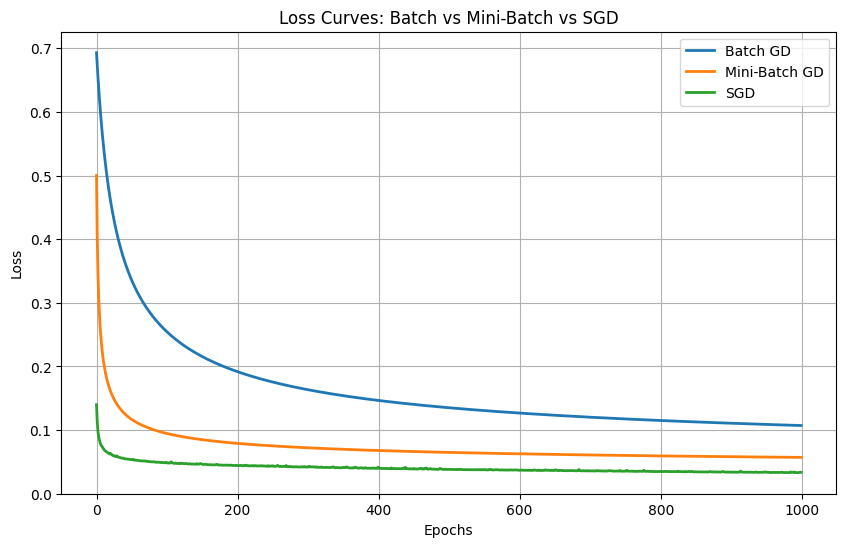

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(losses_batch, label="Batch GD", linewidth=2)
plt.plot(losses_mini, label="Mini-Batch GD", linewidth=2)
plt.plot(losses_sgd, label="SGD", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curves: Batch vs Mini-Batch vs SGD")
plt.legend()
plt.grid(True)
plt.show()

Newton-Raphson Logistic Regression Accuracy: 1.0


/tmp/ipython-input-3171095579.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


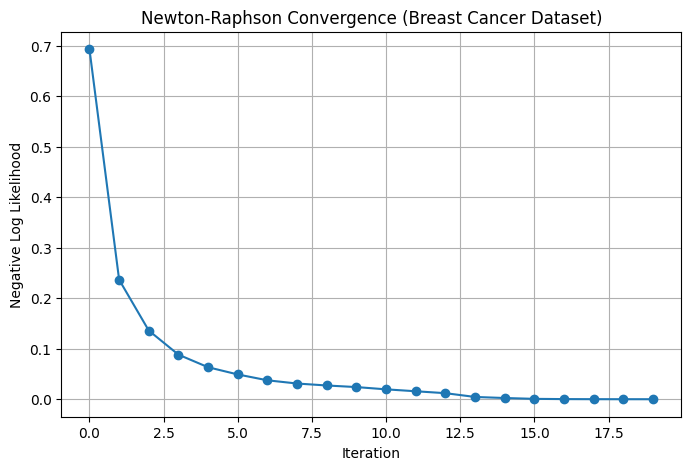

In [13]:
# -------------------------------
# Logistic Regression via Newton-Raphson
# -------------------------------

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (log likelihood)
def compute_loss(y, y_pred):
    # Negative log-likelihood
    return -np.mean(y*np.log(y_pred + 1e-10) + (1-y)*np.log(1-y_pred + 1e-10))

# Newton-Raphson method
def newton_raphson(X, y, tol=1e-6, max_iter=20):
    m, n = X.shape
    weights = np.zeros(n)   # start with zeros
    losses = []

    for i in range(max_iter):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)

        # Gradient
        gradient = np.dot(X.T, (y - y_pred))

        # Hessian
        S = np.diag((y_pred * (1 - y_pred)))
        H = -np.dot(np.dot(X.T, S), X)

        # Update weights: w_new = w_old - H^-1 * gradient
        try:
            update = np.linalg.solve(H, gradient)
        except np.linalg.LinAlgError:
            print("Hessian is singular, stopping.")
            break

        weights -= update

        # Compute loss
        loss = compute_loss(y, y_pred)
        losses.append(loss)

        # Check convergence
        if np.linalg.norm(update) < tol:
            print(f"Converged after {i+1} iterations.")
            break

    return weights, losses

# Run Newton-Raphson
weights_nr, losses_nr = newton_raphson(X, y)

# Predictions
y_pred_nr = (sigmoid(X @ weights_nr) >= 0.5).astype(int)

# Accuracy
acc_nr = accuracy_score(y, y_pred_nr)

print("Newton-Raphson Logistic Regression Accuracy:", acc_nr)

# Plot losses
plt.figure(figsize=(8,5))
plt.plot(losses_nr, marker="o")
plt.xlabel("Iteration")
plt.ylabel("Negative Log Likelihood")
plt.title("Newton-Raphson Convergence (Breast Cancer Dataset)")
plt.grid(True)
plt.show()
